# Training 3 using pre-trained InceptionV3

In [1]:
import tensorflow as tf

2024-01-14 17:28:26.549166: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-14 17:28:26.735036: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-14 17:28:27.614509: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/lib64:
2024-01-14 17:28:27.614653: W tensorflow/c

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
from PIL import Image
import os
import scipy

In [4]:
train_dir = 'datasetX/trainX'
valid_dir = 'datasetX/validX'

In [21]:
# Define image dimensions and batch size
image_size = (299, 299)
batch_size = 32

In [6]:
# Data augmentation and preprocessing for the training and validation set
train_datagen = ImageDataGenerator(
    rotation_range=10,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    rescale=1./255
)

valid_datagen = ImageDataGenerator(
    rotation_range=10,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    rescale=1./255
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)


Found 13626 images belonging to 56 classes.
Found 1667 images belonging to 56 classes.


In [ ]:
train_generator.class_indices

In [ ]:
class_names = list(train_generator.class_indices.keys())
class_names

In [82]:
import matplotlib.pyplot as plt
from IPython.display import HTML

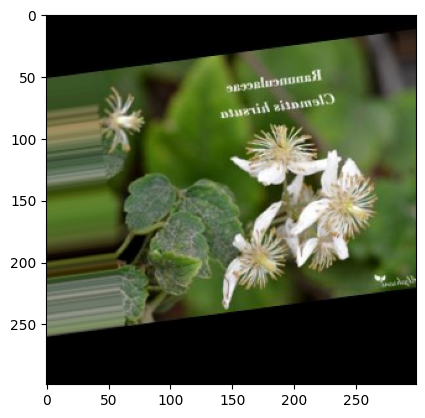

In [10]:
count = 0
for image_batch, label_batch in train_generator:
    plt.imshow(image_batch[0])
    plt.show()
    break

### Using pre-trained MobileNetV2 model

In [11]:
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D

In [12]:
# Load the MobileNetV2 model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

2024-01-14 17:29:08.878909: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 11659 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:18:00.0, compute capability: 8.6
2024-01-14 17:29:08.883953: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 12951 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:3b:00.0, compute capability: 8.6
2024-01-14 17:29:08.886538: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 14169 MB memory:  -> device: 2, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:86:00.0, compute capability: 8.6
2024-01-14 17:29:08.887090: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 11757 MB memory:  -> device: 3, name: NVIDIA GeForce RTX 3090

In [13]:
num_classes=56

In [14]:
# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(299, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

In [15]:
# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

In [16]:
# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

In [17]:
# Compile the model
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // batch_size,
    epochs=40,
    validation_data=valid_generator,
    validation_steps=valid_generator.n // batch_size
)

Epoch 1/40


2024-01-14 17:29:29.645513: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8500
2024-01-14 17:29:31.566240: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


425/425 [==============================] - 306s 703ms/step - loss: 2.0255 - accuracy: 0.4895 - val_loss: 1.3876 - val_accuracy: 0.6436
Epoch 2/40
425/425 [==============================] - 308s 725ms/step - loss: 1.1027 - accuracy: 0.7001 - val_loss: 1.1387 - val_accuracy: 0.6827
Epoch 3/40
425/425 [==============================] - 297s 698ms/step - loss: 0.8586 - accuracy: 0.7570 - val_loss: 1.1131 - val_accuracy: 0.7079
Epoch 4/40
425/425 [==============================] - 294s 691ms/step - loss: 0.7307 - accuracy: 0.7898 - val_loss: 0.9912 - val_accuracy: 0.7374
Epoch 5/40
425/425 [==============================] - 309s 727ms/step - loss: 0.6480 - accuracy: 0.8130 - val_loss: 1.0398 - val_accuracy: 0.7266
Epoch 6/40
425/425 [==============================] - 318s 747ms/step - loss: 0.5787 - accuracy: 0.8326 - val_loss: 0.9892 - val_accuracy: 0.7428
Epoch 7/40
425/425 [==============================] - 309s 728ms/step - loss: 0.5163 - accuracy: 0.8452 - val_loss: 0.9543 - val_accura

In [19]:
test_dir = 'datasetX/testX'

In [46]:
# Data augmentation and preprocessing for the test set

test_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=10,
      horizontal_flip=True,
      zoom_range=0.2,
      shear_range=0.2,
      width_shift_range=0.1,
      height_shift_range=0.1

)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode= 'categorical'
)


Found 1738 images belonging to 56 classes.


In [47]:
#MobileNetV2
scores = model.evaluate(test_generator)

55/55 [==============================] - 35s 634ms/step - loss: 1.0254 - accuracy: 0.8165


In [48]:
scores

[1.0253795385360718, 0.8164557218551636]

In [49]:
history.params

{'verbose': 1, 'epochs': 40, 'steps': 425}

In [50]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [51]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [71]:
 predictions = model.predict(test_generator)

55/55 [==============================] - 36s 627ms/step


In [72]:
predicted_labels = np.argmax(predictions, axis=1)

In [73]:
true_labels = test_generator.classes

In [76]:
# !pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 5.6 MB/s eta 0:00:0000:010:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 9.5 MB/s eta 0:00:00


In [77]:
from sklearn.metrics import classification_report

In [78]:
 from sklearn.metrics import precision_recall_fscore_support

In [ ]:
   metrics = precision_recall_fscore_support(true_labels, predicted_labels, average='macro')
   print("Precision:", metrics[0])
   print("Recall:", metrics[1])
   print("F1-score:", metrics[2])

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_labels, predicted_labels)
top_n_classes = 5  # Adjust as needed
top_n_indices = np.argsort(np.sum(cm, axis=1))[-top_n_classes:]

confusion_matrix(model, test_generator, display_labels=class_names[top_n_indices], cmap=plt.cm.Blues)
plt.show()

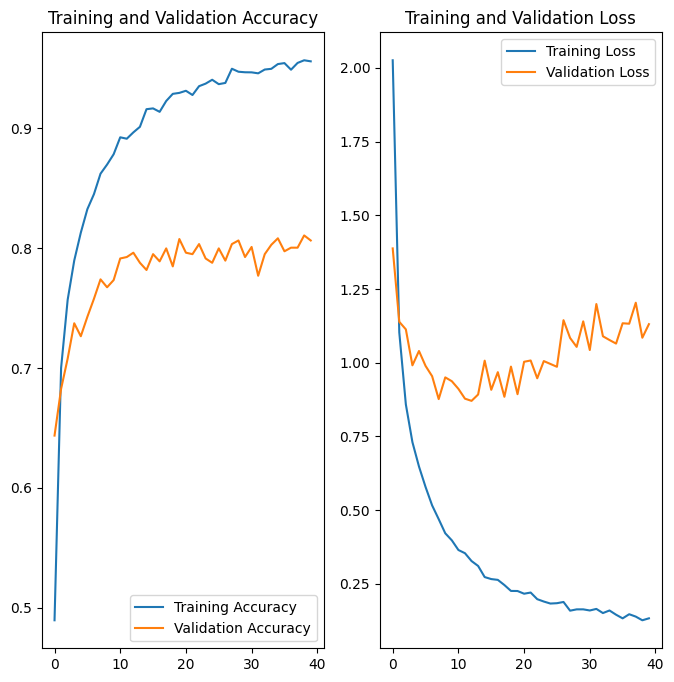

In [52]:
import matplotlib.pyplot as plt

EPOCHS = 40

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

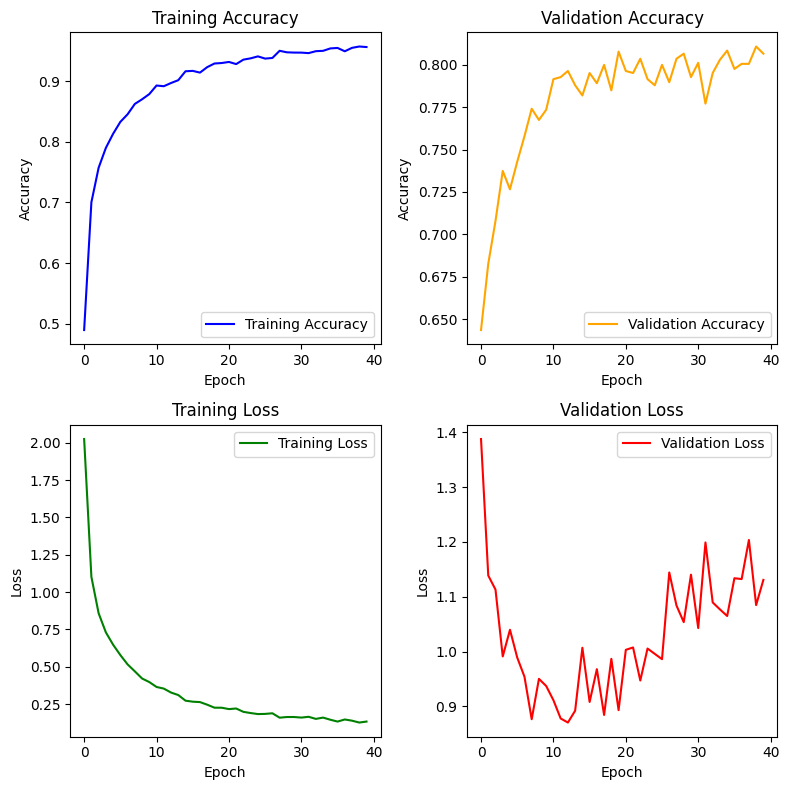

In [93]:
import matplotlib.pyplot as plt

EPOCHS = 40

# Plot Training Accuracy
plt.figure(figsize=(8, 8))

plt.subplot(2, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy', color='blue')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot Validation Accuracy
plt.subplot(2, 2, 2)
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy', color='orange')
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot Training Loss
plt.subplot(2, 2, 3)
plt.plot(range(EPOCHS), loss, label='Training Loss', color='green')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Plot Validation Loss
plt.subplot(2, 2, 4)
plt.plot(range(EPOCHS), val_loss, label='Validation Loss', color='red')
plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()

first image to predict
actual label: Artemisia abyssinica
1/1 [==============================] - 0s 54ms/step
predicted label: Artemisia abyssinica


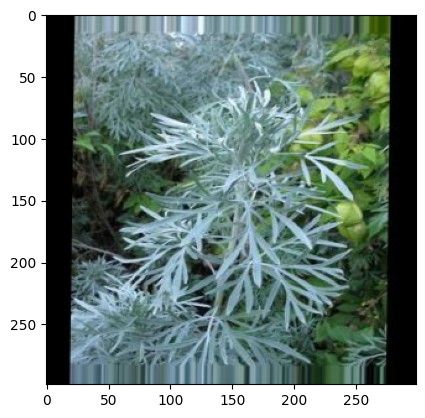

In [36]:
import numpy as np
for images_batch, labels_batch in test_generator:

    first_image = images_batch[0]
    first_label = int(labels_batch[0])

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    break

First image to predict
Actual label: Carica papaya
1/1 [==============================] - 0s 60ms/step
Predicted label: Carica papaya


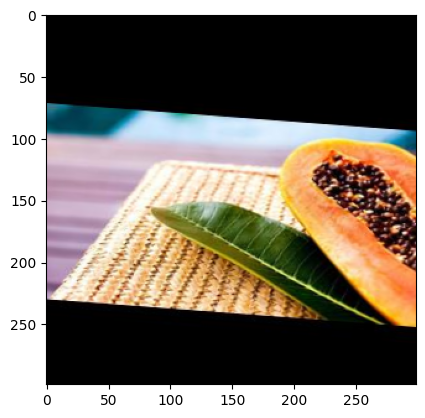

In [94]:
import numpy as np

for images_batch, labels_batch in test_generator:
   
    first_image = images_batch[0]
    first_label = np.argmax(labels_batch[0])  # Use np.argmax to get the class index

    print("First image to predict")
    plt.imshow(first_image)
    print("Actual label:", class_names[first_label])

    batch_predictions = model.predict(images_batch)
    predicted_label = class_names[np.argmax(batch_predictions[0])]  # Use np.argmax for categorical class mode
    print("Predicted label:", predicted_label)

    break

1/1 [==============================] - 0s 55ms/step


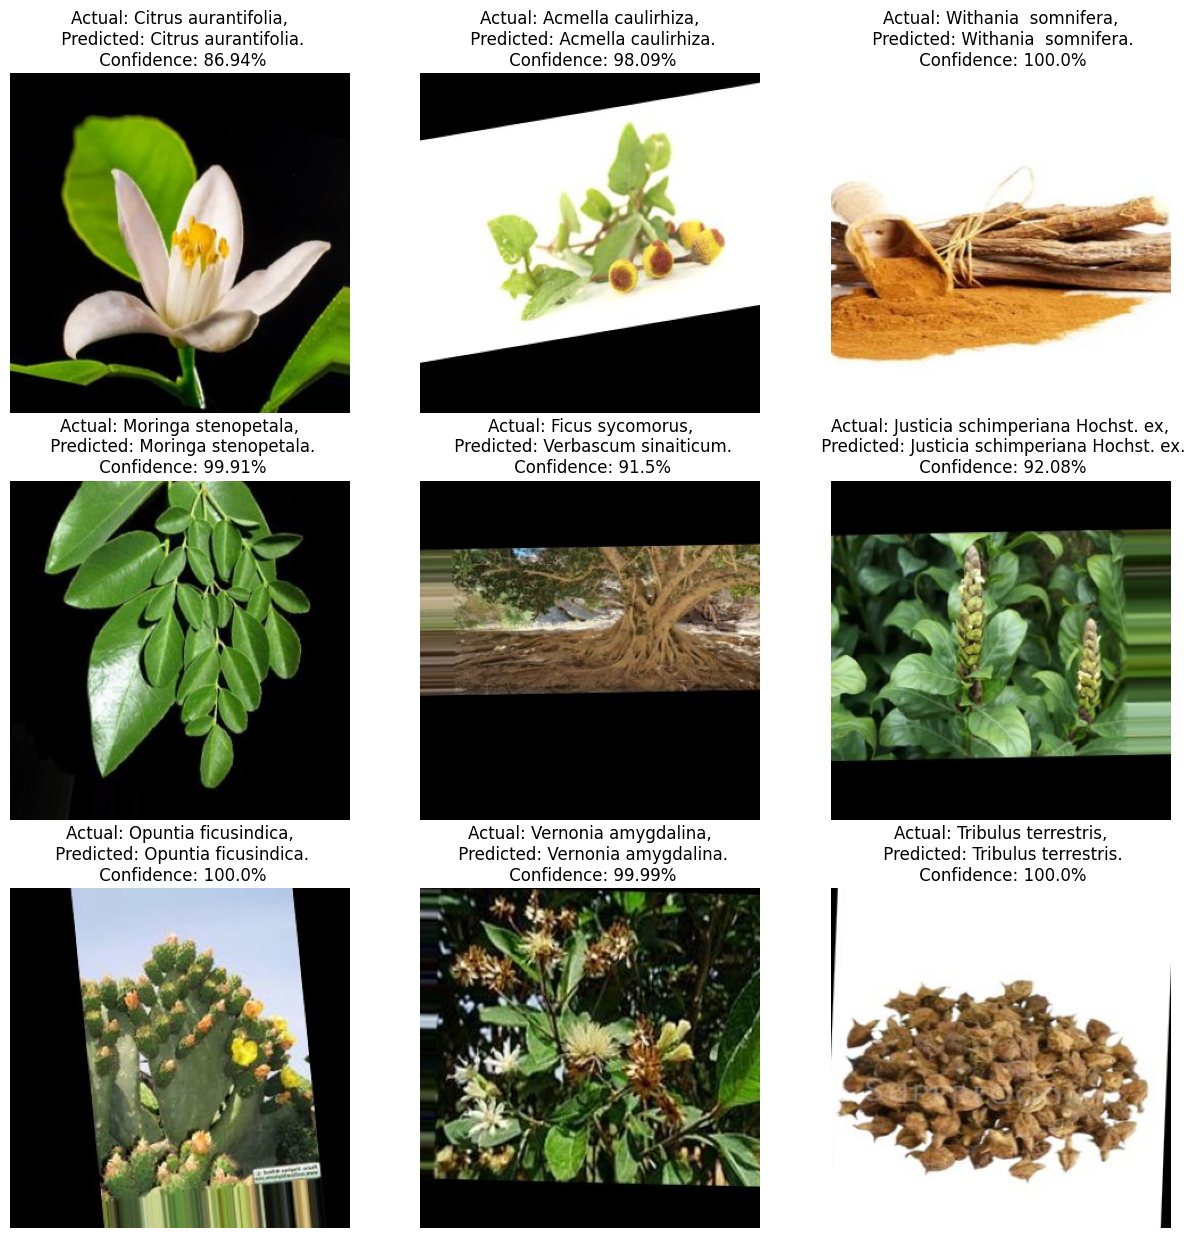

In [57]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])

        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[np.argmax(labels[i])]  # Access class_names using np.argmax

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")
    break

1/1 [==============================] - 0s 39ms/step


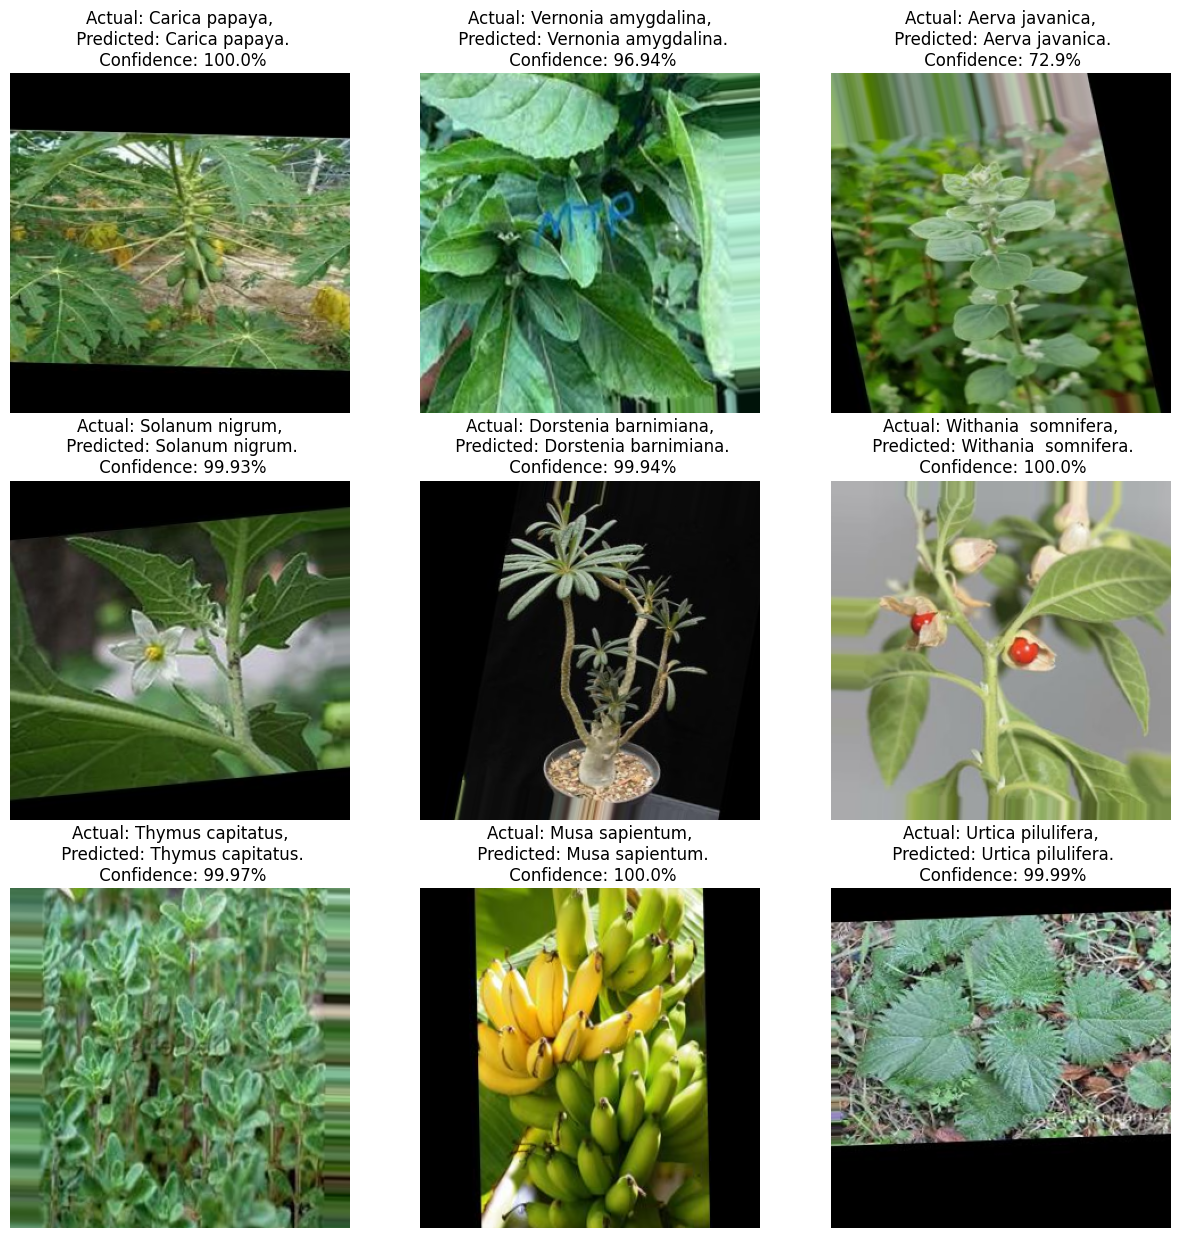

In [63]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])

        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[np.argmax(labels[i])]  # Access class_names using np.argmax

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")
    break

In [64]:
model.save("saved_models/TrainedModel4_MobileNetV2.h5")

In [65]:
model.save("saved_models/TrainedModel4_MobileNetV2.keras")

In [66]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("saved_models/TrainedModel4_MobileNetV2.tflite", 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmp3x4xaw20/assets


INFO:tensorflow:Assets written to: /tmp/tmp3x4xaw20/assets
2024-01-14 21:27:44.332345: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2024-01-14 21:27:44.332384: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2024-01-14 21:27:44.472839: I tensorflow/cc/saved_model/loader.cc:229] Restoring SavedModel bundle.
2024-01-14 21:27:45.248414: I tensorflow/cc/saved_model/loader.cc:213] Running initialization op on SavedModel bundle at path: /tmp/tmp3x4xaw20
2024-01-14 21:27:45.437643: I tensorflow/cc/saved_model/loader.cc:305] SavedModel load for tags { serve }; Status: success: OK. Took 1105077 microseconds.
